# Kalibirierung übers Prandlt Rohr

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
plt.rcParams.update({'font.size': 16, 'legend.title_fontsize': 16, 'legend.fontsize': 16, "axes.labelsize": 16, "axes.labelpad": 4})

rho_Fluid = 810
rho_Luft = 1.225
g = 9.81

Text(0, 0.5, '$v$ / m/s')

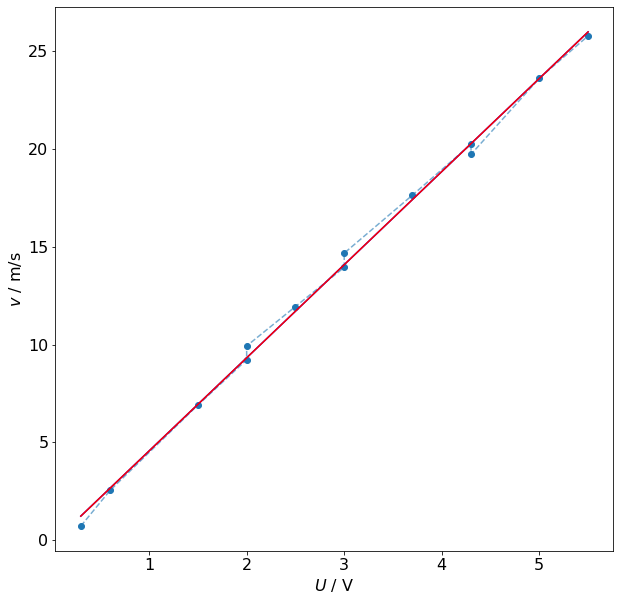

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
U =     [0.3,   0.6,   1.5,     2,      2,      2.5,    3,      3,     3.7,     4.3,    4.3,    5,  5.5]
x =     [1,     12.5,  92,      164,    76,     110,    150,    83,    120,     158,    60,     86, 102.5] # in mm 
alpha = [1/25,  1/25,  1/25,    1/25,   1/10,   1/10,   1/10,   1/5,   1/5,     1/5,    1/2,    1/2, 1/2]
U = np.array(U)
x = np.array(x) * 0.001 # in m
alpha = np.array(alpha)

def velocity(x):
    v = np.sqrt((2*rho_Fluid*x*alpha*g)/rho_Luft)
    return v
v= velocity(x)
plt.scatter(U, velocity(x))
plt.plot(U, v, ls="--", alpha=0.6)
res = stats.linregress(U, v)

p = np.polyfit(U,v,1)  
f = np.poly1d(p) 
plt.plot(U,f(U), 'b-',label="Polyfit")

plt.plot(U, res.intercept + res.slope*U, 'r', label='fitted line')

ax.set_xlabel("$U$ / V")
ax.set_ylabel("$v$ / m/s")

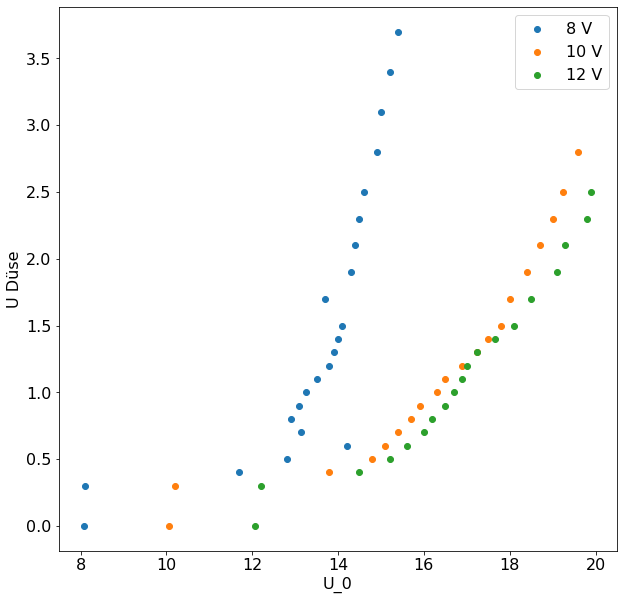

In [45]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
U_D_8 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1, 3.4, 3.7])
U_0_8 = np.array([8.08, 8.1, 11.7, 12.8, 14.2, 13.14, 12.9, 13.1, 13.26, 13.5, 13.8, 13.9, 14, 14.1, 13.7, 14.3, 14.4, 14.5, 14.6, 14.9, 15, 15.2, 15.4])

U_D_10 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8])
U_0_10 = np.array([10.07, 10.2, 13.8, 14.8, 15.1, 15.4, 15.7, 15.9, 16.3, 16.5, 16.9, 17.25, 17.5, 17.8, 18, 18.4, 18.7, 19, 19.25, 19.6])

U_D_12 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5])
U_0_12 = np.array([12.07, 12.2, 14.5, 15.2, 15.6, 16, 16.2, 16.5, 16.7, 16.9, 17, 17.25, 17.65, 18.1, 18.5, 19.1, 19.3, 19.8, 19.9])

plt.scatter(U_0_8, U_D_8, label ="8 V")
plt.scatter(U_0_10, U_D_10, label ="10 V")
plt.scatter(U_0_12, U_D_12, label ="12 V")


# plt.scatter(U_D_8, U_0_8, label ="8 V")
# plt.scatter(U_D_12, U_D_12, label ="12 V")

ax.set_ylabel("U Düse")
ax.set_xlabel("U_0")
ax.legend()


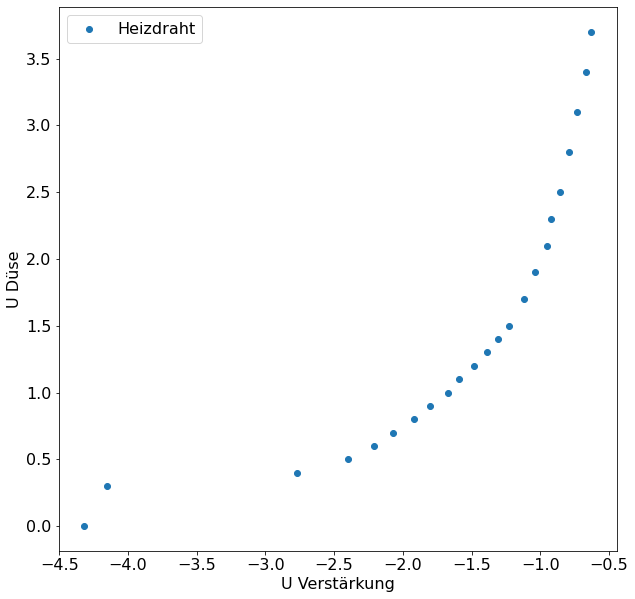

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
U_D_CCT = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1, 3.4, 3.7])
U_Verst = np.array([4.32, 4.15, 2.77, 2.4, 2.21, 2.07, 1.92, 1.8, 1.67, 1.59, 1.48, 1.39, 1.31, 1.23, 1.12, 1.04, 0.95, 0.92, 0.86, 0.79, 0.73, 0.67, 0.63])*(-1)

plt.scatter (U_Verst, U_D_CCT, label="Heizdraht")
ax.set_ylabel("U Düse")
ax.set_xlabel("U Verstärkung")
ax.legend()
